In [3]:
from functools import reduce

In [21]:
p = reduce(lambda x,y: x+y, [1,2,3,4,5])
print(p)

15


各类Post请求主要包含json格式、xml格式、文件上传（form-data）、及默认传递的urlencoded

# HTTP的报文结构
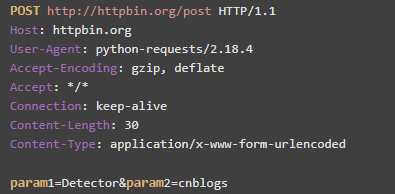
上面这张图是Fiddle捕获的一个实际请求报文，它清晰的展示了HTTP 消息的结构。详情如下：

请求行：即第一排用空格分割成的三个小块，分别对应请求方法、请求URL、HTTP协议版本三个部分。
请求头：从第二行开始到倒数第二行都是我们的请求头（headers）。
消息主体：截图的最后一行是请求体，也就是我们要发送的数据的主体，消息主体（entity-body）。
也就是说一个正常的post请求主要由请求行，请求头，消息主体组成。接下来我们来了解一下什么是Content-Type。

# Content-Type的定义

要了解Content-Type首先我们要先对HTTP/1.1 协议有一定的了解。

众所周知，HTTP/1.1 规定的 HTTP 请求方法有 OPTIONS、GET、HEAD、POST、PUT、DELETE、TRACE、CONNECT 8种，其中 POST 一般用来向服务端提交数据。
但是可能很多人不知道的是，虽然HTTP/1.1协议规定 了POST 提交的数据必须放在消息主体（entity-body）中，但并没有规定数据必须使用什么样的编码方式。也就是说，开发者完全可以自己决定消息主体的格式。

但是数据除了请求方发送之外，还要服务端能够解析才有意义。而这个解析操作的第一步通常就是是根据请求头（headers）中的 Content-Type 字段来获知请求中的消息主体的编码方式，然后再对数据进行对应的解析操作。也就是说请求头中的Content-Type字段用于规定请求体的编码格式，服务端代码需要使用它对接收到的消息主体进行解析。

# Content-Type的格式种类

我们前面说了HTTP/1.1没有规定协议编码方式，但是随着协议的应用推广，已经慢慢的形成了四种最常用的编码方式，基本上形成了相应的规范，即基本固定的Content-Type取值application/x-www-form-urlencoded（默认格式）、application/json、text/xml、multipart/form-data，与默认传递的urlencoded、json格式、xml格式、文件格式一 一对应。

接下来我们会每个编码方式的应用场景及Python实现分别进行介绍。我们此次主要使用http://httpbin.org/来做演示。

httpbin是一个专门用来测试 HTTP 请求及响应的网站，其github开源地址是https://github.com/requests/httpbin。作者另外一个开源库就是大名鼎鼎的requests，它也是我们演示代码中重要的部分。

# 代码演示

In [ ]:
import requests
import json
from bs4 import BeautifulSoup

## application/x-www-form-urlencoded格式

In [14]:
datas = {"param1": "Detector", "param2": "cnblogs"}
r = requests.post("http://httpbin.org/post", data=datas)
print(r.text)
print(r.status_code)



{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "param1": "Detector", 
    "param2": "cnblogs"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "30", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-6061e660-2b626bb75b7598411182ceda"
  }, 
  "json": null, 
  "origin": "42.247.44.114", 
  "url": "http://httpbin.org/post"
}



## application/json格式
### application/json 这个 Content-Type 作为响应头大家肯定不陌生。实际上，现在越来越多的人把它作为请求头，用来告诉服务端消息主体是序列化后的 JSON 字符串。由于 JSON 规范的流行，除了低版本 IE 之外的各大浏览器都原生支持 JSON.stringify，服务端语言也都有处理 JSON 的函数，使用 JSON 不会遇上什么麻烦。

In [15]:
headers = {'Content-Type': 'application/json'}
datas = json.dumps({"param1": "Detector", "param2": "cnblogs"})
r = requests.post("http://httpbin.org/post", data=datas, headers=headers)
print(r.text)

{
  "args": {}, 
  "data": "{\"param1\": \"Detector\", \"param2\": \"cnblogs\"}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "43", 
    "Content-Type": "application/json", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-6061e70f-54ca2bae06043a182d1c143f"
  }, 
  "json": {
    "param1": "Detector", 
    "param2": "cnblogs"
  }, 
  "origin": "42.247.44.114", 
  "url": "http://httpbin.org/post"
}



## text/xml数据格式
### 它是一种使用 HTTP 作为传输协议，XML 作为编码方式的远程调用规范。典型的 XML-RPC（XML Remote Procedure Call） 请求数据是这样的：

In [16]:
headers = {"Content-Type": "text/xml"}
datas = """<?xml version="1.0"?>
<methodCall>
    <methodName>examples.getStateName</methodName>
    <params>
        <param>
            <value><i4>41</i4></value>
        </param>
    </params>
</methodCall>"""
r = requests.post("http://httpbin.org/post", data=datas, headers=headers)
print(r.text)

{
  "args": {}, 
  "data": "<?xml version=\"1.0\"?>\n<methodCall>\n    <methodName>examples.getStateName</methodName>\n    <params>\n        <param>\n            <value><i4>41</i4></value>\n        </param>\n    </params>\n</methodCall>", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "198", 
    "Content-Type": "text/xml", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-6061e7c7-6dacce2013a192fc1906972d"
  }, 
  "json": null, 
  "origin": "42.247.44.114", 
  "url": "http://httpbin.org/post"
}



## multipart/form-data数据格式
### multipart/form-data主要用于文件上传，当我们使用它时，必须让 form表单的enctype 等于 multipart/form-data。直接来看一个请求示例，主要实现了上传本地的test.txt文件：

In [18]:
files = {"file": open("your file", "rb")}
r = requests.post("http://httpbin.org/post", files=files)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {
    "file": "18:59:24 Remember to modify your name before you type Hello.\r\n18:59:31 That's how I find you in the text file. So, modify your name and then say hello.\r\n19:00:36 Okay um so it is 7pm, your time, and we're going to get going.\r\n19:00:46 this time, which is the architecture that underlies enterprise systems.\r\n19:01:08 Um, I would like to stop for a moment and just ask for general questions, are there any general questions from the class.\r\n19:01:20 You can just unmute yourself and talk. No need to chat or just unmute yourself and talk.\r\n19:01:29 Hello, Professor\r\n19:01:34 instruction for activities three.\r\n19:01:40 Yeah,\r\n19:01:44 giving you activity three yet.\r\n19:01:47 Is that extraction.\r\n19:01:51 And there are.\r\n19:01:51 Yes, there are.\r\n19:01:56 you will get them in this class.\r\n19:01:56 Oh, I see. Thank you.\r\n19:01:58 Okay.\r\n19:02:00 Other questions.\r\n19:02:07 Okay. Yeah, well, we'll go over a

# 发送GET和POST请求
## 基础操作

In [40]:
#请求地址
url = "http://httpbin.org/get"
#发送get请求
r = requests.get(url)
# 查看发送状态
print(r)
# 获取返回的json数据
print(r.json())

<Response [200]>
{'args': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.24.0', 'X-Amzn-Trace-Id': 'Root=1-6066783a-588dcbbe6a615e5e64232efe'}, 'origin': '42.247.44.114', 'url': 'http://httpbin.org/get'}


In [52]:
url = "http://httpbin.org/post"
data = {
    "产品": ['iPhone', 'iPad', 'iMac'],
    "单价": ['9399', '7699', '13999'],
    "数量": ['2', '1', '1']
}
table = pd.DataFrame(data).to_json()
print(table)
response = requests.post(url, table)
print(response)

{"\u4ea7\u54c1":{"0":"iPhone","1":"iPad","2":"iMac"},"\u5355\u4ef7":{"0":"9399","1":"7699","2":"13999"},"\u6570\u91cf":{"0":"2","1":"1","2":"1"}}
<Response [200]>


## 更多的操作
### 得到html文件后，我们可以输出得其中内容。

In [30]:
# 导入urllib库的urlopen函数
from urllib.request import urlopen 
# 发出请求，获取html
html = urlopen("http://www.baidu.com")
# 获取的html内容是字节，将其转化为字符串
html_text = bytes.decode(html.read())
# 打印html内容
print(html_text)

<!DOCTYPE html><!--STATUS OK-->


    <html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#2932e1"><meta name="description" content="全球最大的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" /><link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"/><link rel="dns-prefetch" href="//dss1.bdstatic.com"/><link rel="dns-prefetch" href="//ss1.bdstatic.com"/><link rel="dns-prefetch" href="//sp0.baidu.com"/><link rel="dns-prefetch" href="//sp1.baidu.com"/><link rel="dns-prefetch" href="//sp2.baidu.com"/><title>百度一下，你就知道</title><style index="newi" type="text/css">

### 使用BeautifulSoup库来解析html文件

In [31]:
# 导入urlopen函数
from urllib.request import urlopen
# 导入BeautifulSoup
from bs4 import BeautifulSoup as bf
# 请求获取HTML
html = urlopen("http://www.baidu.com")
# 用BeautifulSoup解析html
obj = bf(html.read(),'html.parser')
# 从标签head、title里提取标题
title = obj.head.title
# 打印标题
print(title)

<title>百度一下，你就知道</title>


### 找到所有图片的信息

In [32]:
pic_info = obj.find_all('img')
# 分别打印每个图片的信息
for i in pic_info:
    print(i)

<img src="http://ss.bdimg.com/static/superman/img/topnav/baiduyun@2x-e0be79e69e.png"/>
<img src="http://ss.bdimg.com/static/superman/img/topnav/zhidao@2x-e9b427ecc4.png"/>
<img src="http://ss.bdimg.com/static/superman/img/topnav/baike@2x-1fe3db7fa6.png"/>
<img src="http://ss.bdimg.com/static/superman/img/topnav/tupian@2x-482fc011fc.png"/>
<img src="http://ss.bdimg.com/static/superman/img/topnav/baobaozhidao@2x-af409f9dbe.png"/>
<img src="http://ss.bdimg.com/static/superman/img/topnav/wenku@2x-f3aba893c1.png"/>
<img src="http://ss.bdimg.com/static/superman/img/topnav/jingyan@2x-e53eac48cb.png"/>
<img src="http://ss.bdimg.com/static/superman/img/topnav/yinyue@2x-c18adacacb.png"/>
<img class="index-logo-src" height="129" hidefocus="true" id="s_lg_img" onerror="this.src='//www.baidu.com/img/flexible/logo/pc/index.png';this.onerror=null;" src="//www.baidu.com/img/dong_528d34b686d4889666f77c62b9a65857.gif" usemap="#mp" width="270"/>
<img class="index-logo-srcnew" height="129" hidefocus="true

### 最后，得到网页logo的信息，并下载logo

In [35]:
# 导入urlopen
from urllib.request import urlopen
# 导入BeautifulSoup
from bs4 import BeautifulSoup as bf
# 导入urlretrieve函数，用于下载图片
from urllib.request import urlretrieve
# 请求获取HTML
html = urlopen("http://www.baidu.com/")
# 用BeautifulSoup解析html
obj = bf(html.read(),'html.parser')
# 从标签head、title里提取标题
title = obj.head.title
# 只提取logo图片的信息
logo_pic_info = obj.find_all('img',class_="index-logo-src")
# 提取logo图片的链接
logo_url = "http:"+logo_pic_info[0]['src']
# 使用urlretrieve下载图片
urlretrieve(logo_url, 'logo.png')

('logo.png', <http.client.HTTPMessage at 0x7fcba93488b0>)

# 简单的爬虫代码演示
以天气网站为例：https://www.timeanddate.com/weather/uk/london/historic

目的是获取任意时间跨度的天气数据，并且结构化保存。让我们开始吧。
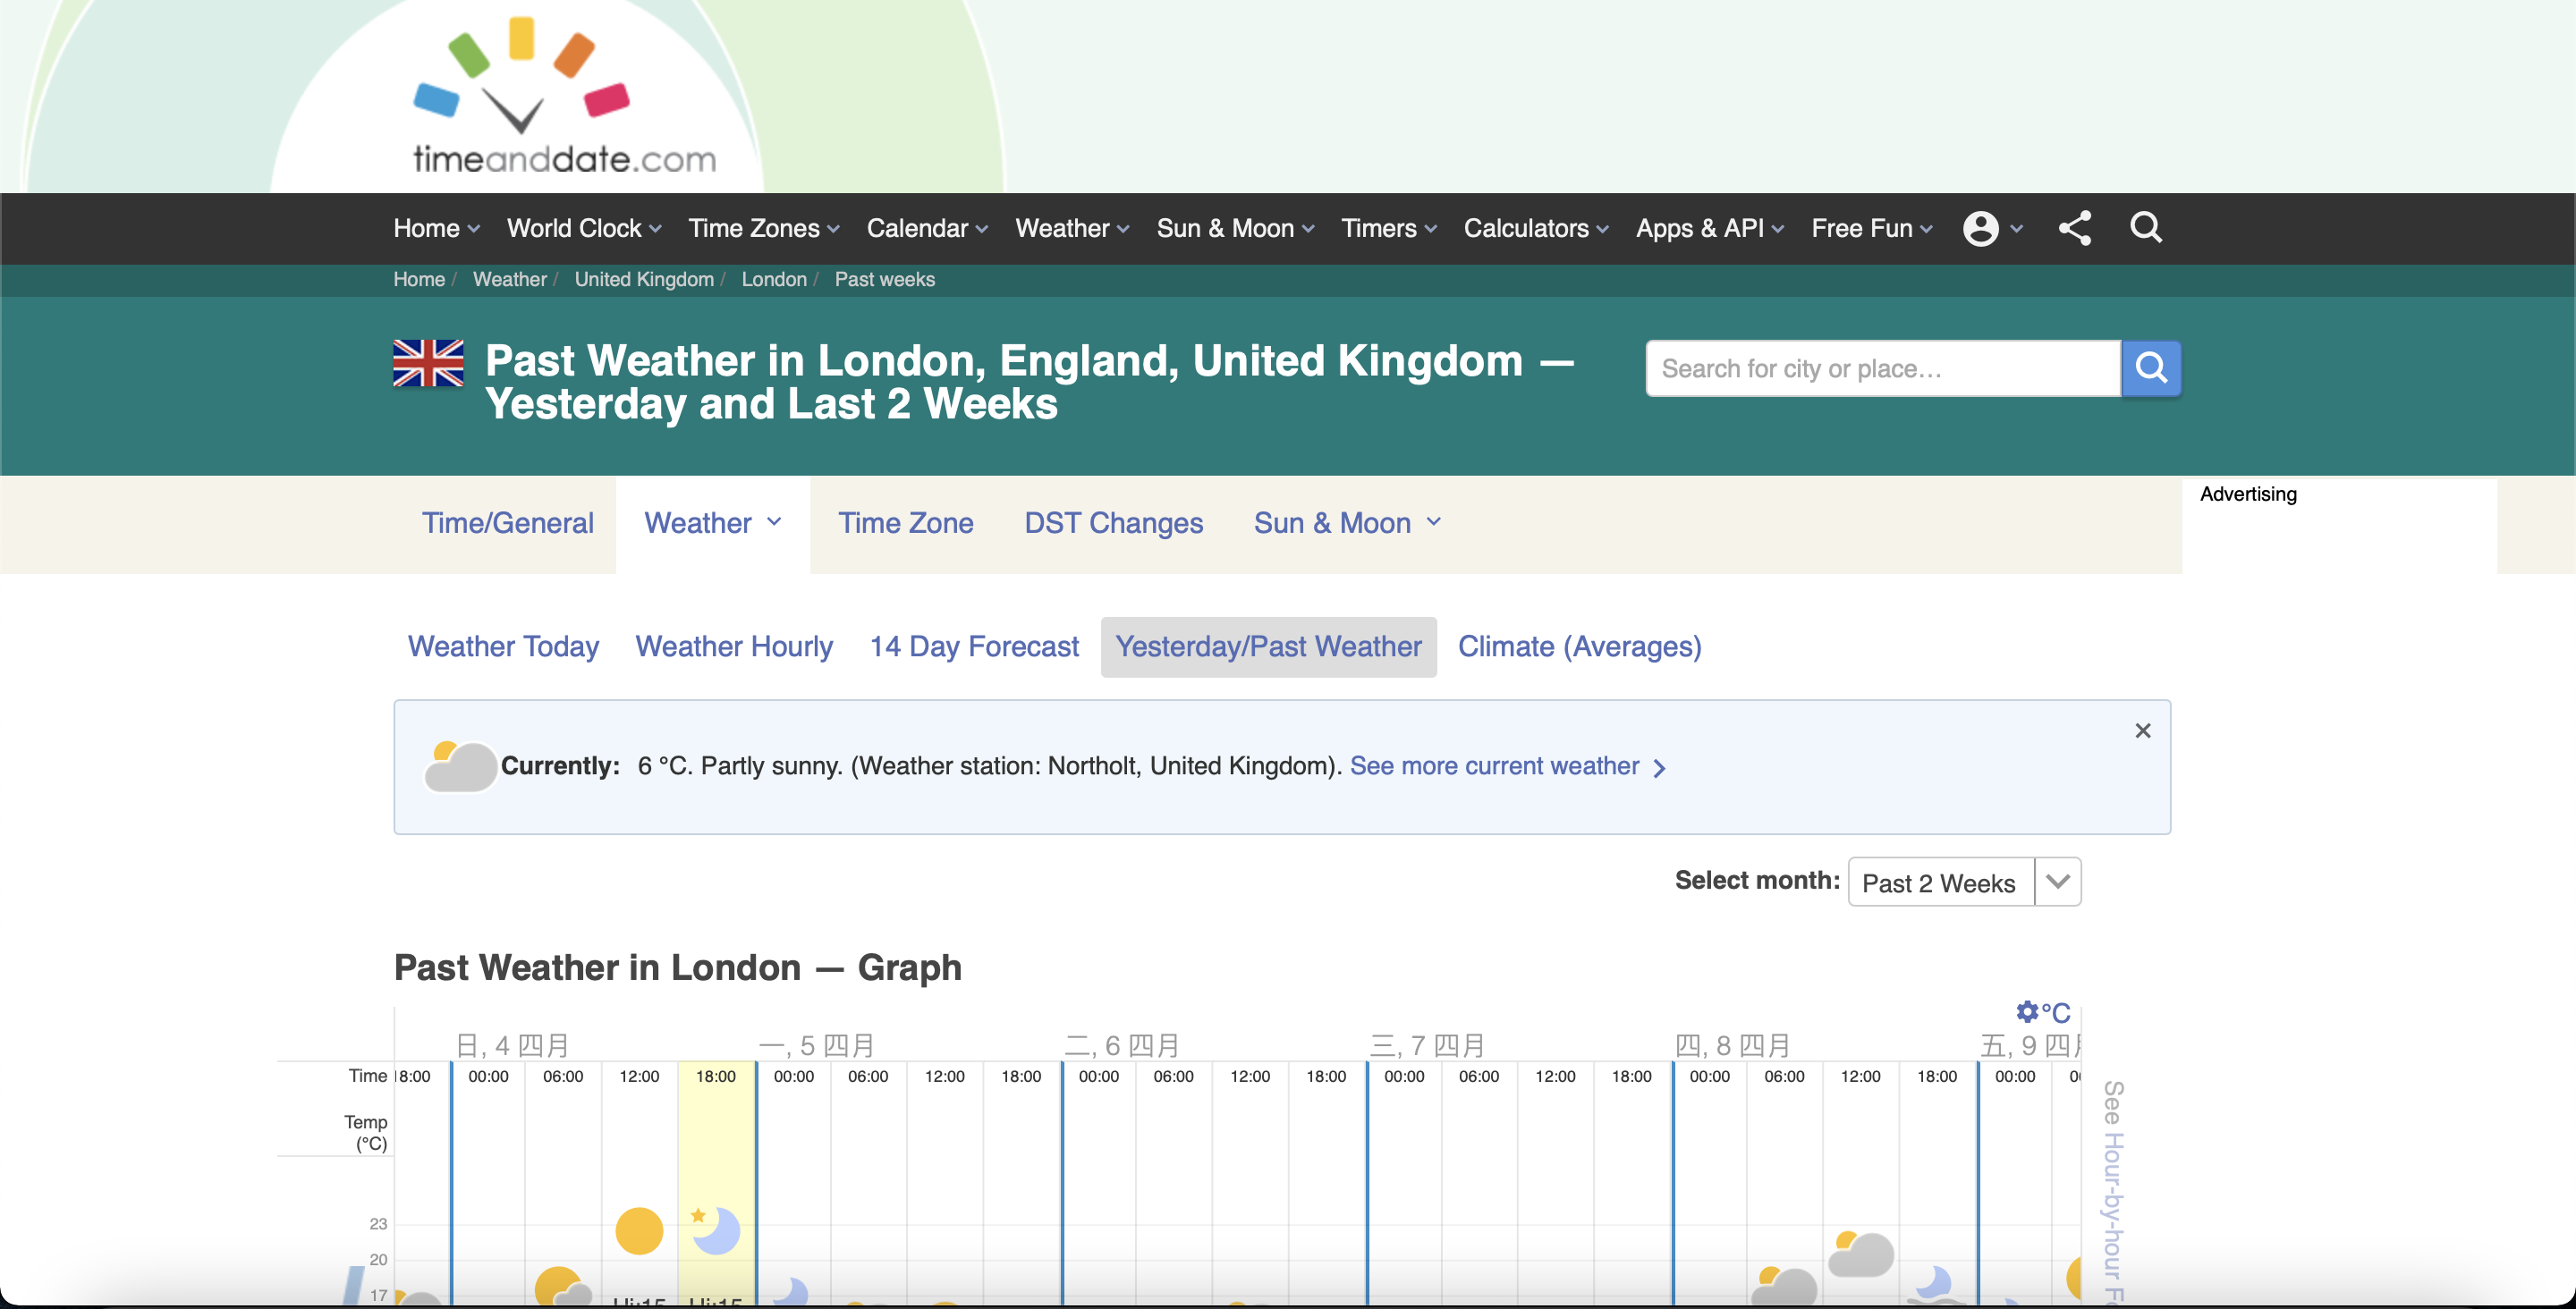


In [ ]:
# 首先倒入所需要的库
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

## 查看html文件，找到数据储存位置
查看输出的html文件，发现天气数据储存在type为text/javascript的script标签中。
在解析html之前，我们需要创建一个Beautiful Soup对象。BeautifulSoup函数里的参数就是我们已经获得的html信息。然后我们使用find_all方法，获得html信息中所有type为text/javascript的script标签。

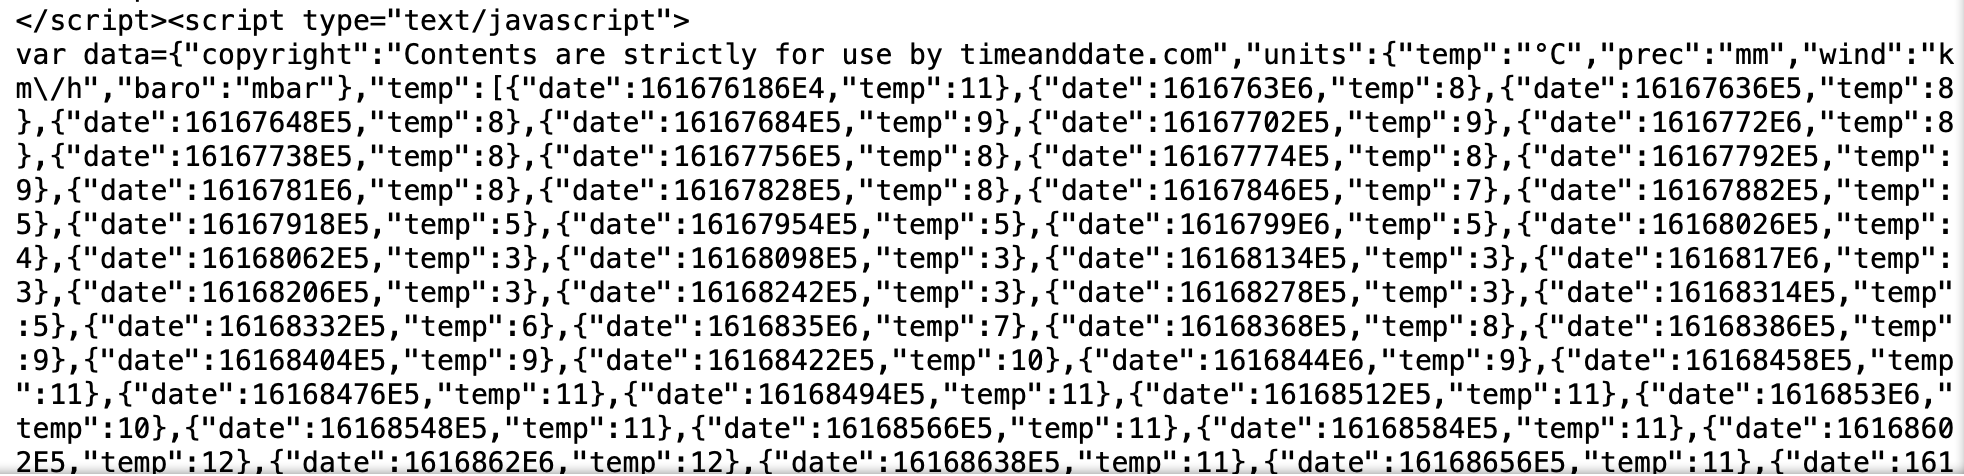

In [150]:
target = 'https://www.timeanddate.com/weather/uk/london/historic'
req = requests.get(url=target)
html = req.text
#print(html)
# 使用find_all方法，获得html信息中所有type为text/javascript的script标签
bf = BeautifulSoup(html)
texts = bf.find_all('script', type = "text/javascript")

# bf.find_all返回的是所有包含该type和标签的列表，因此，我们要找到数据储存在列表的哪一元素中
print(type(texts[1].string))
print(texts[1].string)

# 将数据储存为名称为data的json格式文件
with open('data.json', 'w') as f:
    json.dump(texts[1].string, f)

<class 'bs4.element.Script'>

var data={"copyright":"Contents are strictly for use by timeanddate.com","units":{"temp":"°C","prec":"mm","wind":"km\/h","baro":"mbar"},"temp":[{"date":161676186E4,"temp":11},{"date":1616763E6,"temp":8},{"date":16167636E5,"temp":8},{"date":16167648E5,"temp":8},{"date":16167684E5,"temp":9},{"date":16167702E5,"temp":9},{"date":1616772E6,"temp":8},{"date":16167738E5,"temp":8},{"date":16167756E5,"temp":8},{"date":16167774E5,"temp":8},{"date":16167792E5,"temp":9},{"date":1616781E6,"temp":8},{"date":16167828E5,"temp":8},{"date":16167846E5,"temp":7},{"date":16167882E5,"temp":5},{"date":16167918E5,"temp":5},{"date":16167954E5,"temp":5},{"date":1616799E6,"temp":5},{"date":16168026E5,"temp":4},{"date":16168062E5,"temp":3},{"date":16168098E5,"temp":3},{"date":16168134E5,"temp":3},{"date":1616817E6,"temp":3},{"date":16168206E5,"temp":3},{"date":16168242E5,"temp":3},{"date":16168278E5,"temp":3},{"date":16168314E5,"temp":5},{"date":16168332E5,"temp":6},{"date":1616835E6

## json文件处理
但在在保存过程中，json.dump会自动为引号转译，生成的文件带有大量的\（反斜杠）和一些不符合json文件格式的内容。显然，这样的格式计算机无法识别为符合json格式的文件。我们需要将它们去除，保证json文件可以正常使用。
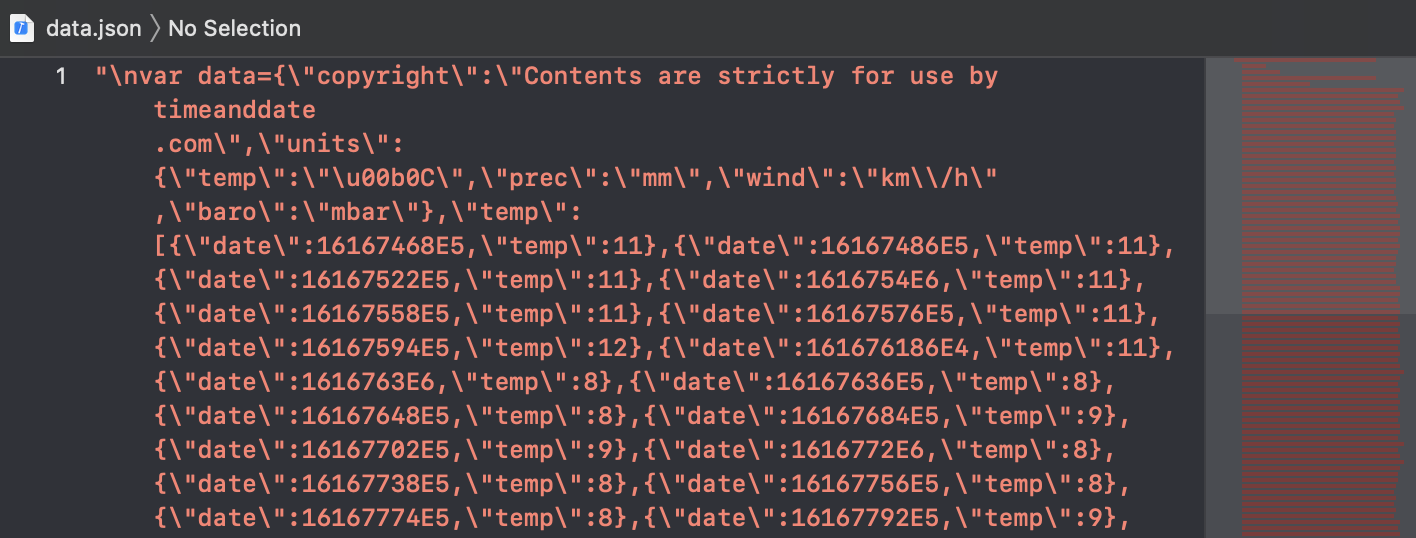



In [148]:
# 读取刚才保存的文件
with open('data.json', 'r') as f:
    #print(type(f))
    
    # 将反斜杠删去
    line = f.readline().replace("\\", "").strip('"')
    # 删除多余的字符
    line = line.strip('nvar data=')
    line = line.strip(';n')

    # 修改后写入新的json文件并保存
    with open('formated_data.json', 'w') as target:
        result = target.write(line)
        #print(result) 

# 打开修改后的新文件formated_data    
bbb = open('formated_data.json', encoding='utf-8')
#1.将数据导入程序
data = json.load(bbb)
print(type(data))
#2.遍历data，打印列表中的每一个字典，发现所有数据储存在temp和detail两个key下
for dict_data in data:
    print(dict_data)


<class 'dict'>
copyright
units
temp
detail
grid
conv
             date  temp
0    1.616747e+12    11
1    1.616749e+12    11
2    1.616752e+12    11
3    1.616754e+12    11
4    1.616756e+12    11
..            ...   ...
544  1.618039e+12     6
545  1.618041e+12     6
546  1.618043e+12     6
547  1.618045e+12     6
548  1.618046e+12     7

[549 rows x 2 columns]
      hl                   hls           hlsh          date     ts  \
0   True  u4e94, 26 u4e09u6708  26 u4e09u6708  1.616738e+12  06:00   
1    NaN                   NaN            NaN  1.616760e+12  12:00   
2    NaN                   NaN            NaN  1.616782e+12  18:00   
3   True  u516d, 27 u4e09u6708  27 u4e09u6708  1.616803e+12  00:00   
4    NaN                   NaN            NaN  1.616825e+12  06:00   
..   ...                   ...            ...           ...    ...   
56   NaN                   NaN            NaN  1.617948e+12  06:00   
57   NaN                   NaN            NaN  1.617970e+12  12:00   
58   

## 结构化储存

In [ ]:
# 最后，建立DataFrame并结构化储存
my_df1 = pd.DataFrame(data['temp'])
print(my_df1)
my_df2 = pd.DataFrame(data['detail'])
print(my_df2)

my_df1.to_csv('Weather_temp.csv')
my_df2.to_csv('Weather_detail.csv')

## 结果
由此，我们便得到了结构化储存的天气数据文件
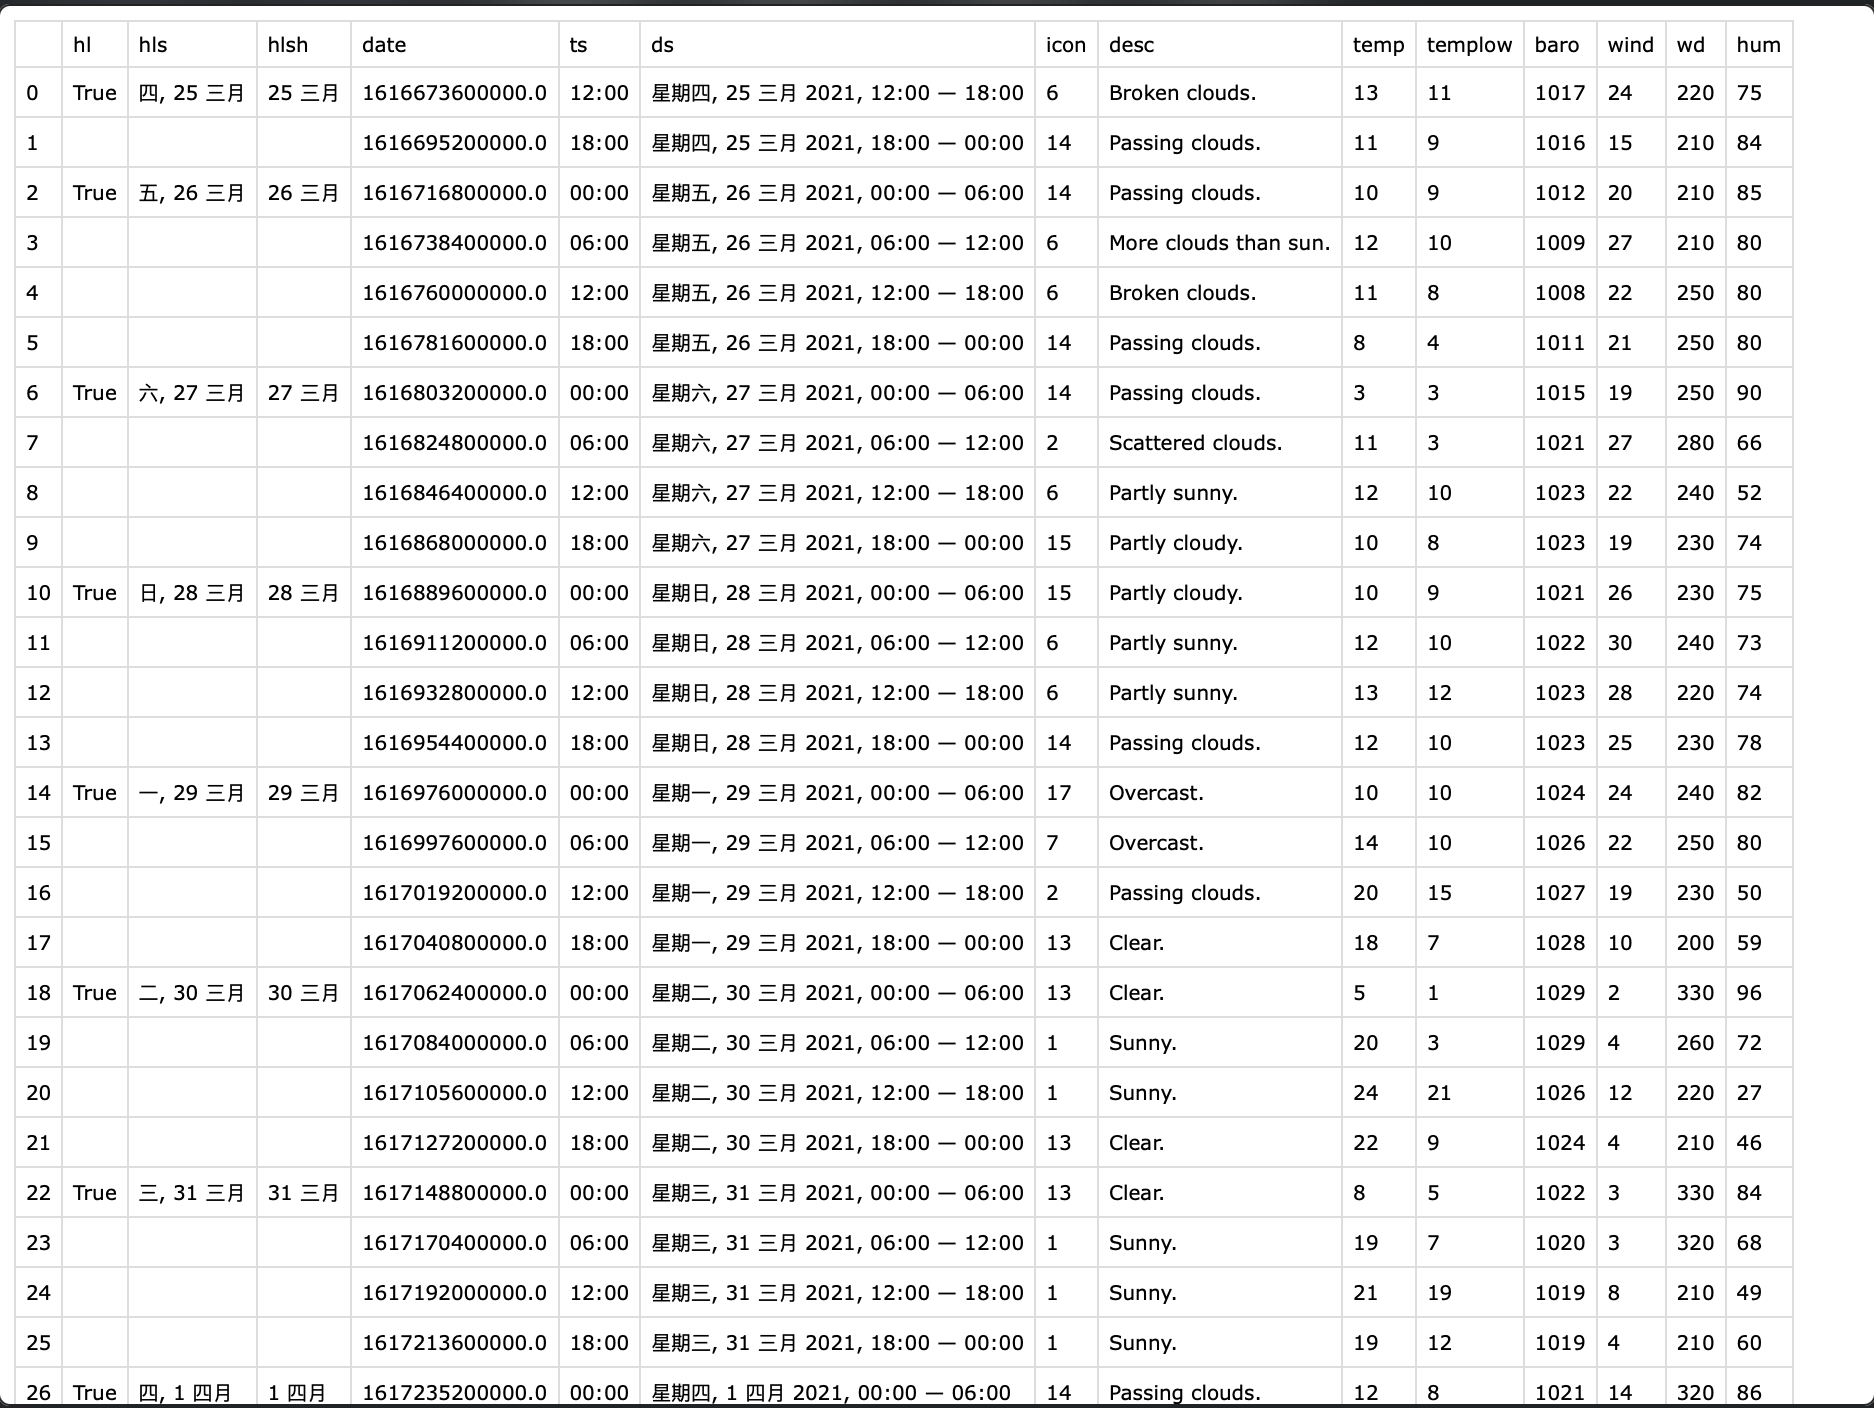

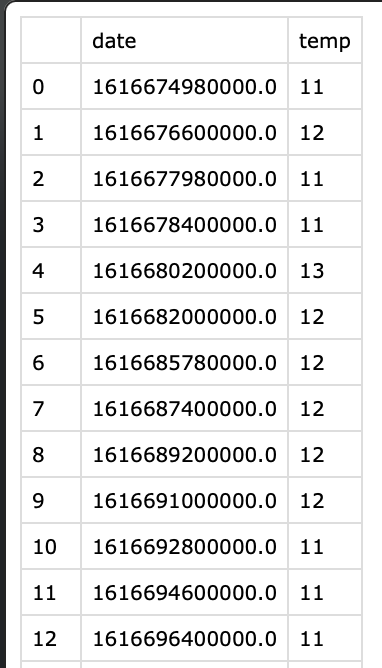

两者并没有交集

In [94]:
my_df3 = pd.merge(my_df2, my_df1, on='date')
print(my_df3)

Empty DataFrame
Columns: [hl, hls, hlsh, date, ts, ds, icon, desc, temp_x, templow, baro, wind, wd, hum, temp_y]
Index: []


In [109]:
url = 'http://data.eastmoney.com/cjsj/gdp.html'
req = requests.get(url= url)
html = req.text
bf = BeautifulSoup(html)
texts = bf.find_all('table', type = "table-model")
print(texts)

[]
